<a href="https://colab.research.google.com/github/ajilmathews05/AJ05/blob/main/dsafinal_intership.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read dataset

In [2]:
df=pd.read_csv('/content/Electronic - Electronic.csv.csv')

In [4]:
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning


In [46]:
df.describe()


,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,5000.000000,4994.000000
mean,43.584600,7.536600,243.721837,26.622330,2.650108,0.220400,717.998214,3.975184,15.638275,0.308370
std,14.919094,4.014858,154.949018,13.586725,1.533394,0.414558,776.789137,0.250691,9.144742,0.461867
min,18.000000,1.000000,15.105730,5.000000,1.000000,0.000000,-201.427094,3.076092,0.000000,0.000000
25%,31.000000,4.000000,119.130074,15.382663,1.000000,0.000000,164.697614,3.799761,7.944790,0.000000
50%,43.000000,7.000000,221.514206,27.848579,2.338884,0.000000,380.548500,3.969738,13.969791,0.000000
75%,56.000000,11.000000,346.173367,38.086993,4.129317,0.000000,1047.426498,4.149998,23.521601,1.000000
max,69.000000,14.000000,699.611576,48.489427,5.000000,1.000000,3523.469177,4.764298,39.235391,1.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

In [48]:
data=df.copy()

Imputing Missing Values

In [49]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


,0
Gender,2
Payment Method,4
Store Rating,3
Membership Status,6
Preferred Visit Time,8


Imputed Results

In [50]:
# Corrected imputation for handling missing values

# For categorical columns, impute with the mode (most frequent value)
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Payment Method'] = data['Payment Method'].fillna(data['Payment Method'].mode()[0])
data['Preferred Visit Time'] = data['Preferred Visit Time'].fillna(data['Preferred Visit Time'].mode()[0])

# For numerical columns, impute with the mean value
data['Store Rating'] = data['Store Rating'].fillna(data['Store Rating'].mean())
data['Membership Status'] = data['Membership Status'].fillna(data['Membership Status'].mean())

# Display the first few rows of the dataset to verify the imputation
data.head()


,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning


# Standardizing categorical values to ensure consistency

In [51]:
# Standardizing categorical values to ensure consistency

# Convert all text to lowercase and remove any leading/trailing whitespace for consistency
data['Region'] = data['Region'].str.lower().str.strip()
data['Product Category'] = data['Product Category'].str.lower().str.strip()
data['Payment Method'] = data['Payment Method'].str.lower().str.strip()
data['Gender'] = data['Gender'].str.lower().str.strip()
data['Preferred Visit Time'] = data['Preferred Visit Time'].str.lower().str.strip()

# Display the unique values after standardization for verification
standardized_values = {
    'Region': data['Region'].unique(),
    'Product Category': data['Product Category'].unique(),
    'Payment Method': data['Payment Method'].unique(),
    'Gender': data['Gender'].unique(),
    'Preferred Visit Time': data['Preferred Visit Time'].unique()
}

standardized_values


{'Region': array(['south', 'east', 'north', 'west'], dtype=object),
 'Product Category': array(['accessories', 'laptop', 'tablet', 'television', 'mobile'],
       dtype=object),
 'Payment Method': array(['upi', 'cash', 'credit card', 'net banking', 'debit card'],
       dtype=object),
 'Gender': array(['male', 'female', 'other'], dtype=object),
 'Preferred Visit Time': array(['evening', 'morning', 'afternoon'], dtype=object)}

# normalize numerical fields

In [52]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler to normalize numerical fields between 0 and 1
scaler = MinMaxScaler()

# List of numerical columns to normalize
numerical_columns = ['Total Spent', 'Discount (%)', 'Revenue', 'Store Rating', 'Loyalty Score']

# Apply MinMaxScaler to normalize the specified numerical fields
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows of the dataframe after normalization to verify changes
data.head()


,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,0.020629,0.967531,1.000000,1,male,south,accessories,upi,0.094145,0.346148,0.091681,1.0,evening
1,69,10,0.591722,0.068654,3.760294,1,female,south,accessories,cash,0.452885,0.281637,0.656675,1.0,evening
2,46,4,0.164552,0.741001,1.771240,1,male,east,laptop,credit card,0.077043,0.501566,0.178981,1.0,morning
3,32,9,0.588186,0.074219,1.926831,0,female,east,tablet,upi,0.275322,0.464594,0.194605,1.0,afternoon
4,60,13,0.866210,0.000000,3.902927,0,female,south,tablet,upi,0.715461,0.436397,0.750881,0.0,morning


# handle outliers

In [53]:
import numpy as np

# Use the Interquartile Range (IQR) method to handle outliers
def handle_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define acceptable range for non-outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the respective boundary values
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# List of numerical columns to handle outliers
numerical_columns_with_potential_outliers = ['Total Spent', 'Discount (%)', 'Revenue', 'Store Rating', 'Loyalty Score']

# Apply the outlier handling function to each numerical column
for column in numerical_columns_with_potential_outliers:
    handle_outliers_iqr(data, column)

# Display the first few rows of the dataframe after handling outliers to verify changes
data.head()


,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,0.020629,0.967531,1.000000,1,male,south,accessories,upi,0.094145,0.346148,0.091681,1.0,evening
1,69,10,0.591722,0.068654,3.760294,1,female,south,accessories,cash,0.452885,0.281637,0.656675,1.0,evening
2,46,4,0.164552,0.741001,1.771240,1,male,east,laptop,credit card,0.077043,0.501566,0.178981,1.0,morning
3,32,9,0.588186,0.074219,1.926831,0,female,east,tablet,upi,0.275322,0.464594,0.194605,1.0,afternoon
4,60,13,0.866210,0.000000,3.902927,0,female,south,tablet,upi,0.690743,0.436397,0.750881,0.0,morning


In [54]:
# Re-apply the MinMaxScaler to normalize the numerical fields after handling outliers

# Apply MinMaxScaler to normalize the specified numerical fields again
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows of the dataframe after normalization to verify changes
data.head()


,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,0.021024,0.967531,1.000000,1,male,south,accessories,upi,0.136295,0.275478,0.091681,1.0,evening
1,69,10,0.603063,0.068654,3.760294,1,female,south,accessories,cash,0.655649,0.197703,0.656675,1.0,evening
2,46,4,0.167706,0.741001,1.771240,1,male,east,laptop,credit card,0.111536,0.462854,0.178981,1.0,morning
3,32,9,0.599460,0.074219,1.926831,0,female,east,tablet,upi,0.398588,0.418279,0.194605,1.0,afternoon
4,60,13,0.882813,0.000000,3.902927,0,female,south,tablet,upi,1.000000,0.384285,0.750881,0.0,morning


Explorary Data Analysis

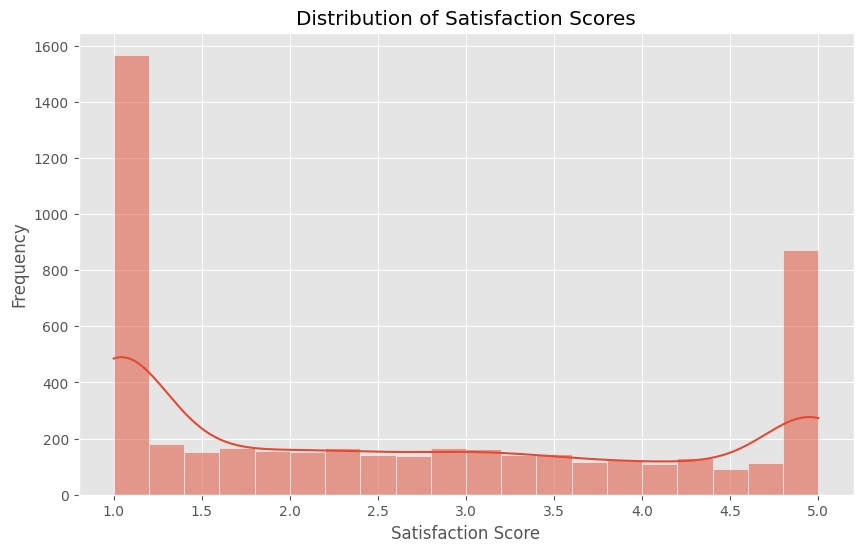

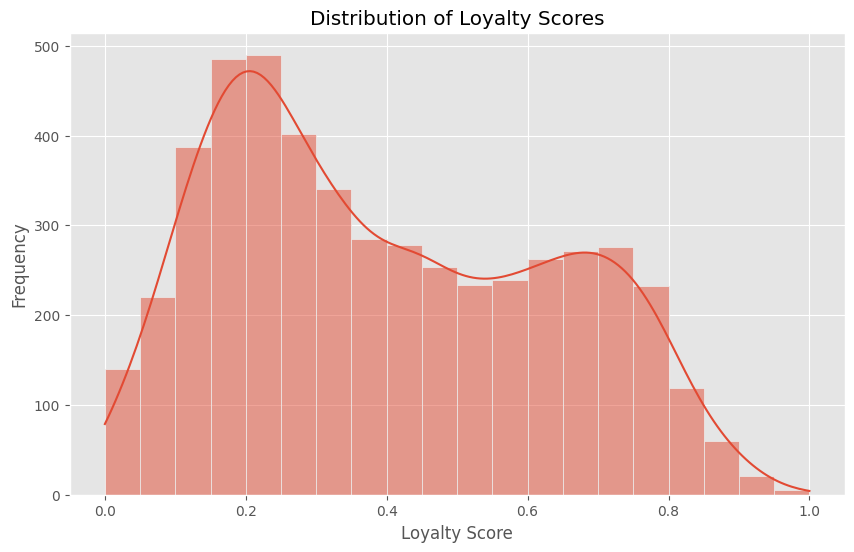

<ipython-input-55-5c5c88d95515>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Preferred Visit Time', data=data, palette='viridis')


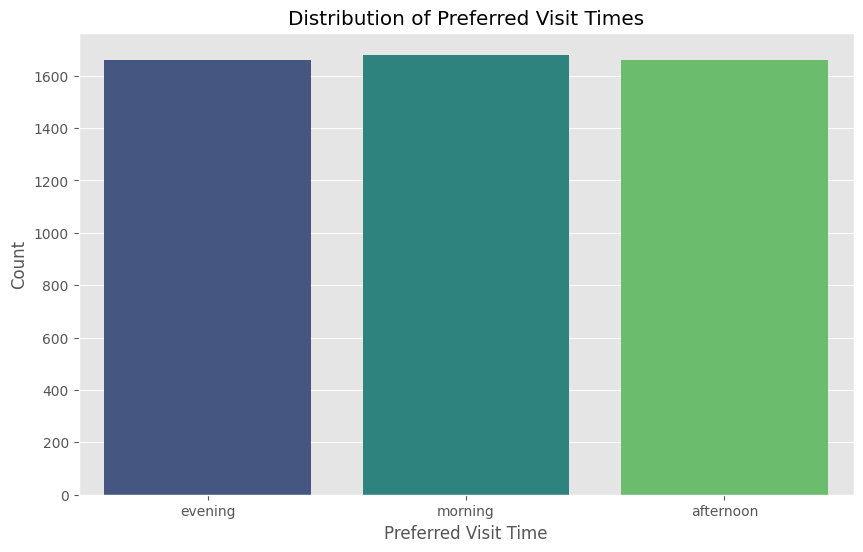

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a common style for plots
plt.style.use('ggplot')

# Analyze the distribution of Satisfaction Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Satisfaction Score'], kde=True, bins=20)
plt.title('Distribution of Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show()

# Analyze the distribution of Loyalty Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Loyalty Score'], kde=True, bins=20)
plt.title('Distribution of Loyalty Scores')
plt.xlabel('Loyalty Score')
plt.ylabel('Frequency')
plt.show()

# Analyze the distribution of Preferred Visit Times
plt.figure(figsize=(10, 6))
sns.countplot(x='Preferred Visit Time', data=data, palette='viridis')
plt.title('Distribution of Preferred Visit Times')
plt.xlabel('Preferred Visit Time')
plt.ylabel('Count')
plt.show()


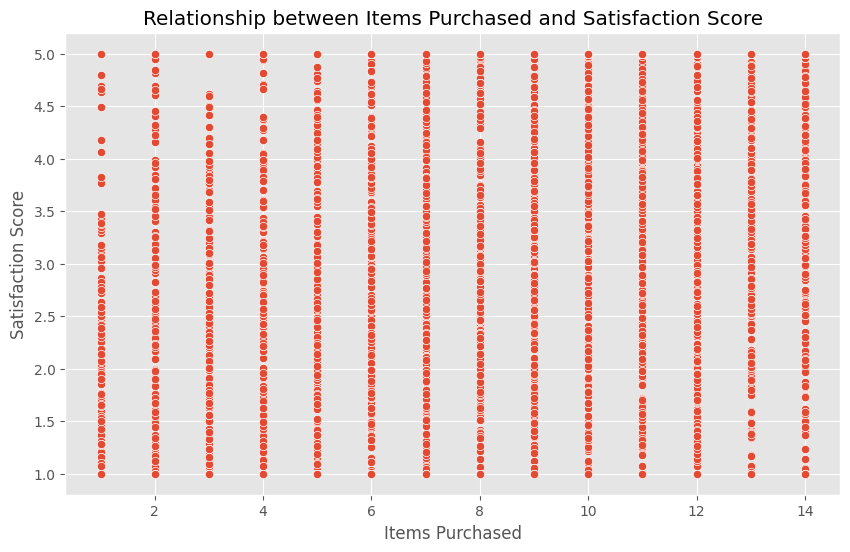

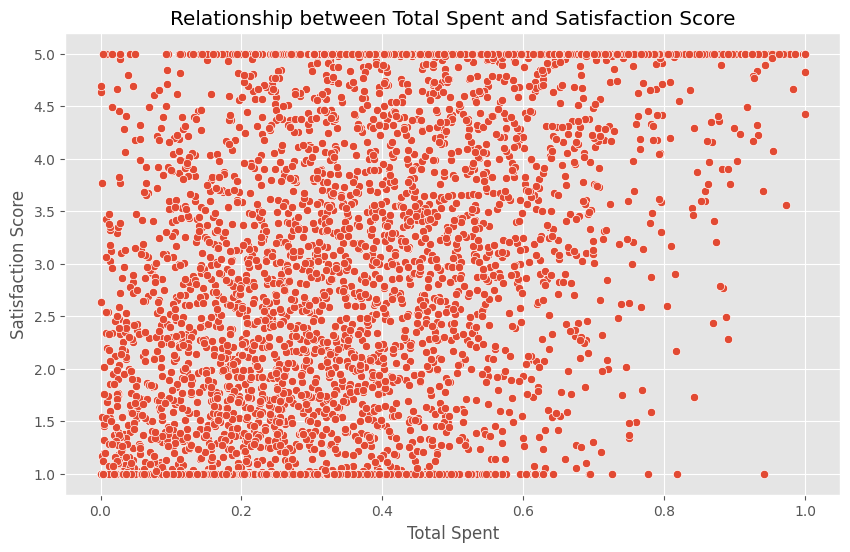

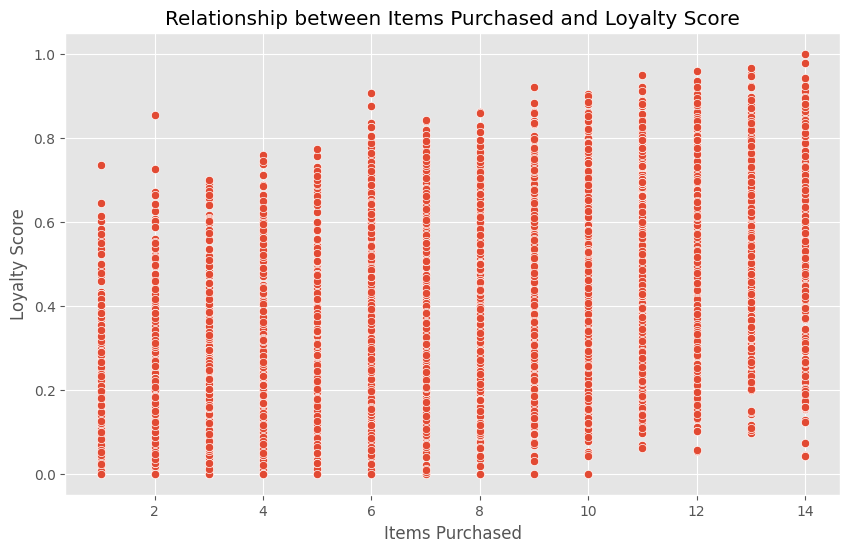

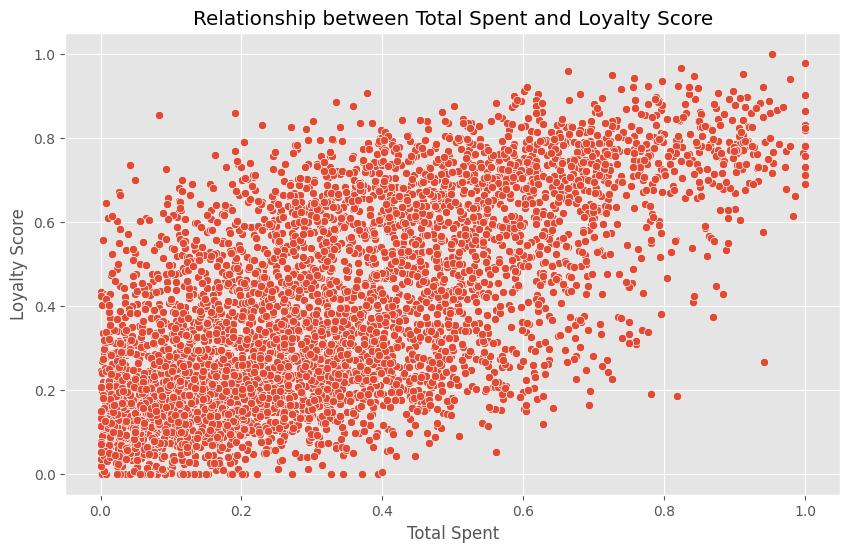

In [56]:
# Plot relationship between "Items Purchased" and "Satisfaction Score"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Items Purchased', y='Satisfaction Score', data=data)
plt.title('Relationship between Items Purchased and Satisfaction Score')
plt.xlabel('Items Purchased')
plt.ylabel('Satisfaction Score')
plt.show()

# Plot relationship between "Total Spent" and "Satisfaction Score"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Spent', y='Satisfaction Score', data=data)
plt.title('Relationship between Total Spent and Satisfaction Score')
plt.xlabel('Total Spent')
plt.ylabel('Satisfaction Score')
plt.show()

# Plot relationship between "Items Purchased" and "Loyalty Score"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Items Purchased', y='Loyalty Score', data=data)
plt.title('Relationship between Items Purchased and Loyalty Score')
plt.xlabel('Items Purchased')
plt.ylabel('Loyalty Score')
plt.show()

# Plot relationship between "Total Spent" and "Loyalty Score"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Spent', y='Loyalty Score', data=data)
plt.title('Relationship between Total Spent and Loyalty Score')
plt.xlabel('Total Spent')
plt.ylabel('Loyalty Score')
plt.show()


# Segmenting the customer data by "Region" and "Product Category" and analyzing key metric

In [57]:
# Segmenting the customer data by "Region" and "Product Category" and analyzing key metrics

# Grouping by "Region" to analyze mean values of key features
region_summary = data.groupby('Region').agg({
    'Total Spent': 'mean',
    'Items Purchased': 'mean',
    'Satisfaction Score': 'mean',
    'Loyalty Score': 'mean',
    'Revenue': 'mean'
}).reset_index()


# Grouping by "Product Category" to analyze mean values of key features
product_category_summary = data.groupby('Product Category').agg({
    'Total Spent': 'mean',
    'Items Purchased': 'mean',
    'Satisfaction Score': 'mean',
    'Loyalty Score': 'mean',
    'Revenue': 'mean'
}).reset_index()

# Display the product category-based summary
# Providing summary dataframes to user for further insights



In [58]:
region_summary

,Region,Total Spent,Items Purchased,Satisfaction Score,Loyalty Score,Revenue
0,east,0.336104,7.443709,2.664952,0.400814,0.345474
1,north,0.348008,7.650291,2.688928,0.405507,0.359468
2,south,0.342184,7.515267,2.625350,0.394094,0.351373
3,west,0.335366,7.539422,2.625032,0.394551,0.337794


In [60]:
product_category_summary

,Product Category,Total Spent,Items Purchased,Satisfaction Score,Loyalty Score,Revenue
0,accessories,0.339304,7.711330,2.667060,0.402960,0.348775
1,laptop,0.334549,7.429418,2.599353,0.389242,0.336447
2,mobile,0.338949,7.384146,2.617103,0.391408,0.345668
3,tablet,0.343401,7.550652,2.657758,0.402389,0.349570
4,television,0.345759,7.604440,2.709702,0.406908,0.361836


## Creating additional features in the dataset

In [61]:
# Creating additional features in the dataset

# Feature 1: Ratio of "Total Spent" to "Items Purchased" (Average Spend per Item)
data['Average Spend per Item'] = data['Total Spent'] / data['Items Purchased']

# Feature 2: "Discounted Spend" - Calculating the effective amount spent after applying the discount
data['Discounted Spend'] = data['Total Spent'] * (1 - data['Discount (%)'])

# Display the first few rows of the dataset to verify the new features


Encoding Values

In [62]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Select categorical columns to encode
categorical_columns = ['Gender', 'Region', 'Product Category', 'Payment Method', 'Preferred Visit Time']

# Fit and transform the encoder on the categorical columns
encoded_features = encoder.fit_transform(data[categorical_columns])

# Retrieve the feature names from the encoder
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Reset the index of encoded_df to match the original data
encoded_df.reset_index(drop=True, inplace=True)

# Drop original categorical columns from the dataset
data_encoded = data.drop(columns=categorical_columns)

# Concatenate the original data (without categorical columns) and the newly encoded features
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)




In [63]:
data_encoded

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status,...,Product Category_laptop,Product Category_mobile,Product Category_tablet,Product Category_television,Payment Method_credit card,Payment Method_debit card,Payment Method_net banking,Payment Method_upi,Preferred Visit Time_evening,Preferred Visit Time_morning
0,56,1,0.021024,0.967531,1.000000,1,0.136295,0.275478,0.091681,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,69,10,0.603063,0.068654,3.760294,1,0.655649,0.197703,0.656675,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,46,4,0.167706,0.741001,1.771240,1,0.111536,0.462854,0.178981,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,32,9,0.599460,0.074219,1.926831,0,0.398588,0.418279,0.194605,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,60,13,0.882813,0.000000,3.902927,0,1.000000,0.384285,0.750881,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,24,1,0.036446,0.943715,1.000000,0,0.053234,0.651749,0.232857,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4996,66,5,0.234326,0.638117,1.000000,0,0.132222,0.423784,0.050005,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4997,26,11,0.712119,0.000000,2.324783,0,0.470918,0.640920,0.426923,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4998,53,10,0.365027,0.436268,5.000000,1,0.511481,0.476695,0.651516,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Feature Importance

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = data_encoded.drop(columns=['Satisfaction Score'])
y = data_encoded['Satisfaction Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a RandomForestRegressor to determine feature importance
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Get feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame to organize feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top features by importance


In [66]:
feature_importance_df

,Feature,Importance
7,Loyalty Score,0.913010
5,Revenue,0.026896
3,Discount (%),0.009605
6,Store Rating,0.007198
2,Total Spent,0.007174
9,Average Spend per Item,0.006979
10,Discounted Spend,0.006966
0,Age,0.006228
1,Items Purchased,0.003541
20,Payment Method_credit card,0.000944


# Correlation Heatmap

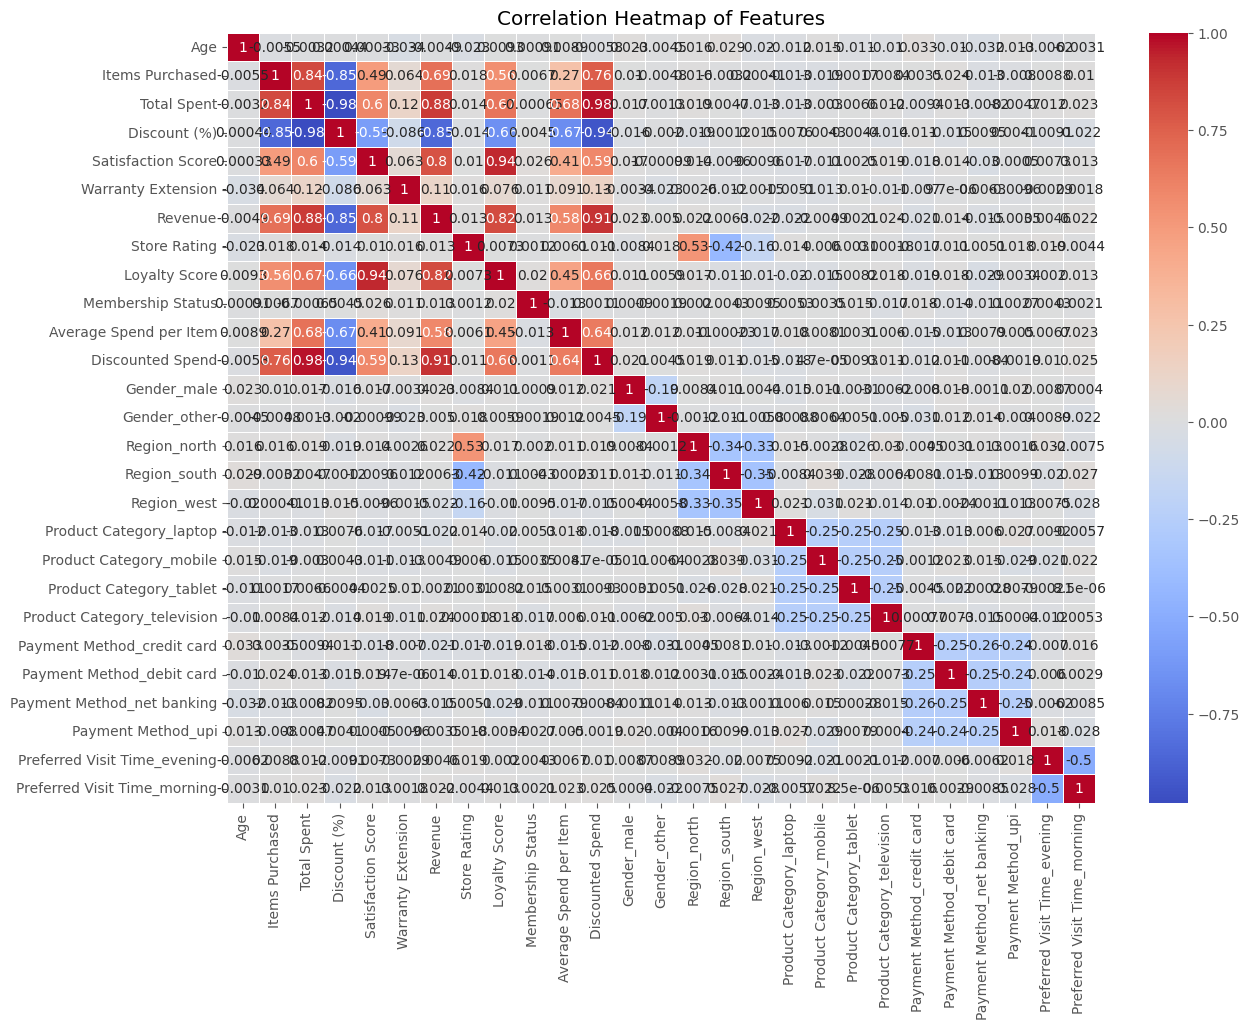

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for the dataset
correlation_matrix = data_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


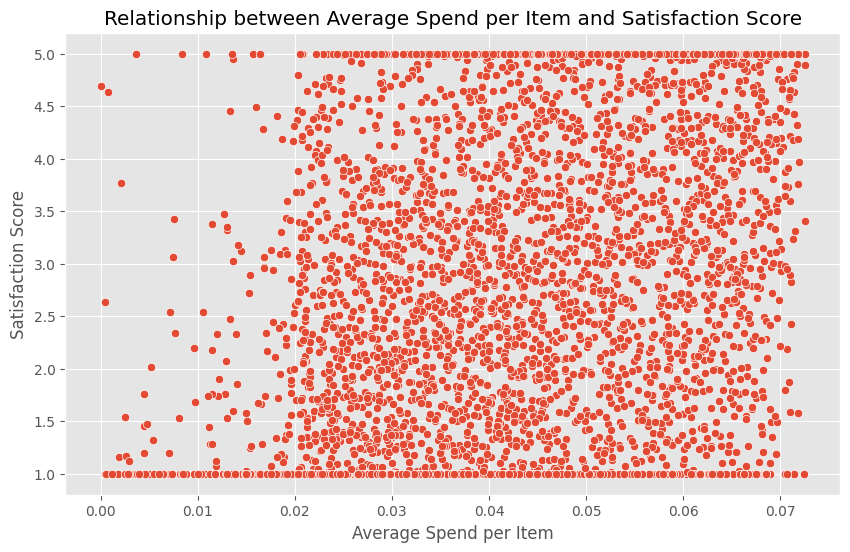

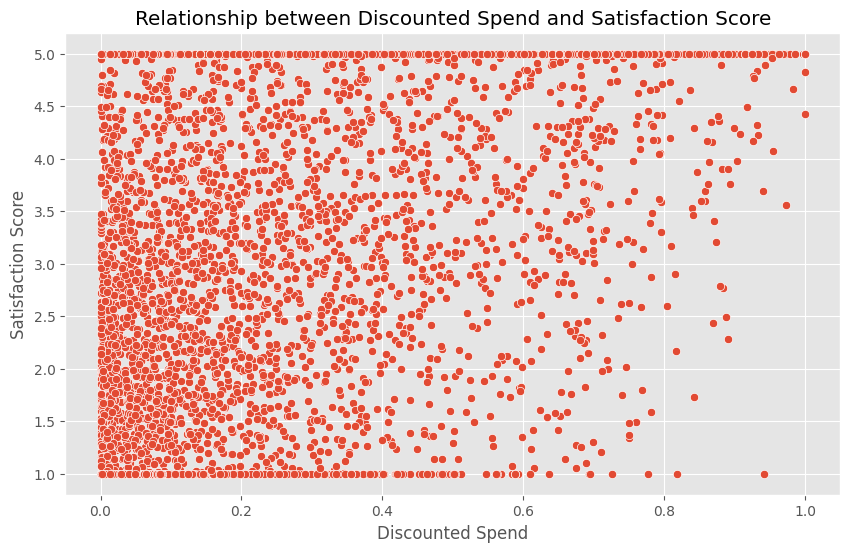

In [68]:
# Plot the relationship between "Average Spend per Item" and "Satisfaction Score"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Spend per Item', y='Satisfaction Score', data=data_encoded)
plt.title('Relationship between Average Spend per Item and Satisfaction Score')
plt.xlabel('Average Spend per Item')
plt.ylabel('Satisfaction Score')
plt.show()

# Plot the relationship between "Discounted Spend" and "Satisfaction Score"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discounted Spend', y='Satisfaction Score', data=data_encoded)
plt.title('Relationship between Discounted Spend and Satisfaction Score')
plt.xlabel('Discounted Spend')
plt.ylabel('Satisfaction Score')
plt.show()


In [70]:
# Extracting the top 7 features based on feature importance for predicting Satisfaction Score
top_7_features = feature_importance_df.head(7)['Feature'].tolist()

# Extracting the data for the top 7 features
X_top_features = data_encoded[top_7_features]
y_target = data_encoded['Satisfaction Score']

# Display the top 7 features selected and their correlation with Satisfaction Score
correlation_with_target = X_top_features.join(y_target).corr()['Satisfaction Score'].sort_values(ascending=False)

# Display the correlation values for the selected feature
correlation_with_target


,Satisfaction Score
Satisfaction Score,1.000000
Loyalty Score,0.935086
Revenue,0.803601
Total Spent,0.597263
Discounted Spend,0.587459
Average Spend per Item,0.407887
Store Rating,0.010408
Discount (%),-0.589436


# Modelling

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y_target, test_size=0.3, random_state=42)

# Initialize the regression models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train Linear Regression Model
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Train Random Forest Model
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Calculate performance metrics for both models
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Create a DataFrame to display model performance
model_performance_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'Mean Squared Error': [linear_mse, rf_mse],
    'R-Squared Score': [linear_r2, rf_r2]
})

model_performance_df

,Model,Mean Squared Error,R-Squared Score
0,Linear Regression,0.229213,0.903546
1,Random Forest,0.156208,0.934267


# GridSearchCV

In [74]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with Random Forest model
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Fit Grid Search to the training data
grid_search_rf.fit(X_train, y_train)

# Retrieve the best parameters and the best model
best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_

# Make predictions using the best Random Forest model
y_pred_best_rf = best_rf_model.predict(X_test)

# Calculate performance metrics for the tuned model
best_rf_mse = mean_squared_error(y_test, y_pred_best_rf)
best_rf_r2 = r2_score(y_test, y_pred_best_rf)

# Display the best parameters and the performance of the tuned model
tuned_model_performance_df = pd.DataFrame({
    'Best Parameters': [best_rf_params],
    'Mean Squared Error': [best_rf_mse],
    'R-Squared Score': [best_rf_r2]
})
tuned_model_performance_df



Fitting 3 folds for each of 108 candidates, totalling 324 fits


,Best Parameters,Mean Squared Error,R-Squared Score
0,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",0.153948,0.935218


In [75]:
X_top_features

,Loyalty Score,Revenue,Discount (%),Store Rating,Total Spent,Average Spend per Item,Discounted Spend
0,0.091681,0.136295,0.967531,0.275478,0.021024,0.021024,0.000683
1,0.656675,0.655649,0.068654,0.197703,0.603063,0.060306,0.561660
2,0.178981,0.111536,0.741001,0.462854,0.167706,0.041927,0.043436
3,0.194605,0.398588,0.074219,0.418279,0.599460,0.066607,0.554969
4,0.750881,1.000000,0.000000,0.384285,0.882813,0.067909,0.882813
...,...,...,...,...,...,...,...
4995,0.232857,0.053234,0.943715,0.651749,0.036446,0.036446,0.002051
4996,0.050005,0.132222,0.638117,0.423784,0.234326,0.046865,0.084798
4997,0.426923,0.470918,0.000000,0.640920,0.712119,0.064738,0.712119
4998,0.651516,0.511481,0.436268,0.476695,0.365027,0.036503,0.205777


# Cross Validation Scores

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
data_encoded = data.drop(columns=categorical_columns)
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)

# Extract the top 7 features for cross-validation
top_7_features = ['Loyalty Score', 'Revenue', 'Total Spent', 'Discounted Spend', 'Store Rating', 'Age', 'Items Purchased']
X_top_features = data_encoded[top_7_features]
y_target = data_encoded['Satisfaction Score']

# Handle missing values by imputing with median
imputer = SimpleImputer(strategy='median')
X_top_features_imputed = imputer.fit_transform(X_top_features)

# Train Random Forest model and perform cross-validation
rf_model = RandomForestRegressor(n_estimators=150, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)
cross_val_scores_imputed = cross_val_score(rf_model, X_top_features_imputed, y_target, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation R-squared scores after imputation
cv_mean_r2_imputed = cross_val_scores_imputed.mean()
cv_std_r2_imputed = cross_val_scores_imputed.std()

# Display cross-validation results after imputation
cv_results_imputed_df = pd.DataFrame({
    'Metric': ['Mean R-Squared', 'Standard Deviation of R-Squared'],
    'Value': [cv_mean_r2_imputed, cv_std_r2_imputed]
})

In [79]:
cv_results_imputed_df

,Metric,Value
0,Mean R-Squared,0.934802
1,Standard Deviation of R-Squared,0.003709


# downloading randomforest pickle file

In [84]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [85]:
# Display the features used for training the model
print("Features used for training the model:")
print(X_top_features.columns.tolist())


Features used for training the model:
['Loyalty Score', 'Revenue', 'Total Spent', 'Discounted Spend', 'Store Rating', 'Age', 'Items Purchased']


In [86]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are defined and preprocessed
model = RandomForestRegressor(n_estimators=150, max_depth=20, random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [87]:
# Load the trained model
model = joblib.load('random_forest_model.pkl')


In [88]:
print("Features used for training:", X_train.columns.tolist())


Features used for training: ['Loyalty Score', 'Revenue', 'Discount (%)', 'Store Rating', 'Total Spent', 'Average Spend per Item', 'Discounted Spend']


In [89]:
# Reimport necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# Define derived features
df['Average Spend per Item'] = df['Total Spent'] / df['Items Purchased']
df['Discounted Spend'] = df['Total Spent'] * (1 - df['Discount (%)'] / 100)

# Select necessary features and target
selected_features = ['Loyalty Score', 'Revenue', 'Total Spent', 'Discounted Spend', 'Average Spend per Item', 'Discount (%)']
X = df[selected_features]
y = df['Satisfaction Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model with the selected features
model = RandomForestRegressor(n_estimators=150, max_depth=20, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Save the trained model
joblib.dump(model, 'random_forest_model_updated.pkl')

# Display evaluation metrics
{
    "Mean Squared Error": mse,
    "R-Squared Score": r2
}


{'Mean Squared Error': 0.1552630760615707,
 'R-Squared Score': 0.9346647349587862}